In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Check path during tests
import pandas as pd
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

# Plib imports
import Plib.DataFarm.MStack as ms    #30Y hist. stock, realtime, intraday, 75 indices
import Plib.Stats.Utils as sapi    

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
symbol='GDX'
dt_start='2010-10-01'
dt_end='2020-10-30'
df=ms.get_mstackHdata(symbol,dt_start,dt_end,limit=2000)
df.head(2)

Open   High    Low  Close  Adjusted_close     Volume
Date                                                             
2010-10-01  56.45  57.25  55.93  56.60       52.325534  9595448.0
2010-10-04  56.37  56.37  55.20  55.55       51.354831  7089781.0

In [4]:
col='Volume'
y=pd.DataFrame(df[col])
results,x=sapi.getBestDistFit(y)

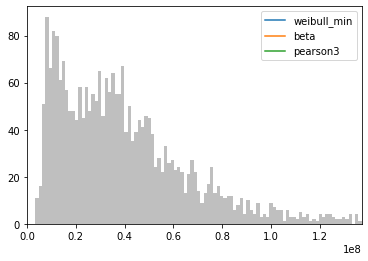


Distribution parameters:
------------------------

Distribution: weibull_min
Parameters: (0.05029795104733621, 3477568.9999999995, 2.6883710628145137)

Distribution: beta
Parameters: (1.6250404361552908, 11924.849495018478, 3394304.7742432375, 272070026534.83765)

Distribution: pearson3
Parameters: (1.5688473401313265, 40464027.88722801, 29078500.825917885)


In [5]:
y=pd.DataFrame(df[col]).Volume
sapi.plotBestFit(y,x,results)

In [6]:
sapi.getSeriesZScore(df,col,0.15)

(-0.007889297087191521, Date
 2010-10-07    18951020.0
 2010-10-19    16650721.0
 2010-10-21    13767671.0
 2010-11-03    15068751.0
 2010-11-04    13991147.0
                  ...    
 2020-10-26    17881875.0
 2020-10-27    14636849.0
 2020-10-28    38818917.0
 2020-10-29    22331970.0
 2020-10-30    27663936.0
 Name: Volume, Length: 1776, dtype: float64)

In [7]:
df1=sapi.getSeriesZScore(df,col,limit=0)
df1

(0,              Open    High      Low  Close  Adjusted_close      Volume  \
 Date                                                                    
 2010-10-01  56.45  57.250  55.9300  56.60       52.325534   9595448.0   
 2010-10-04  56.37  56.370  55.2000  55.55       51.354831   7089781.0   
 2010-10-05  56.81  57.830  56.7150  57.26       52.935691  12005449.0   
 2010-10-06  57.49  58.410  57.2120  58.12       53.730743  11074407.0   
 2010-10-07  58.58  58.580  55.9700  56.58       52.307045  18951020.0   
 ...           ...     ...      ...    ...             ...         ...   
 2020-10-26  38.52  39.160  38.1700  38.21       38.210000  17881875.0   
 2020-10-27  38.27  38.860  38.0877  38.83       38.830000  14636849.0   
 2020-10-28  37.72  37.880  36.3400  36.52       36.520000  38818917.0   
 2020-10-29  36.06  37.285  36.0100  36.95       36.950000  22331970.0   
 2020-10-30  37.33  37.570  36.4877  37.49       37.490000  27663936.0   
 
               ZScore  
 Date    

In [35]:
#################################################
# Velocity, Acceleration, Jerk
#################################################      
def vaj(df,n, lbl='Close'):
    import Plib.Signals.Filters as flt

    def change(df,n, lbl='Close'):
        return (df[lbl]/df[lbl].shift(n))
    
    df['velocity_'+str(n)]= flt.movingaverage(change(df,n, lbl=lbl),3)
    df['acceleration_'+str(n)]=flt.movingaverage(change(df,n, lbl='velocity_'+str(n)),3)
    df['jerk_'+str(n)]=flt.movingaverage(change(df,n, lbl='acceleration_'+str(n)),3)
    df['velocity_'+str(n)]=df['velocity_'+str(n)]-1
    df['acceleration_'+str(n)]=df['acceleration_'+str(n)]-1
    df['jerk_'+str(n)]=df['jerk_'+str(n)]-1
    return df
df2=vaj(df,10, lbl='Close')


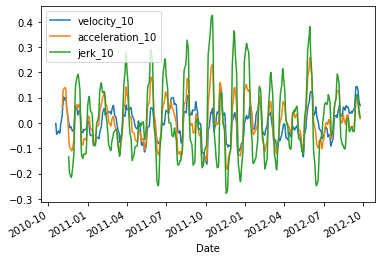

In [36]:
df2=df2[['velocity_10','acceleration_10','jerk_10']]
#df2=df2-1
df2.head(500).plot()